In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataLoader, Blurr, Add_noise
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.simplex import Simplex

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

In [2]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
x_i = x_i/np.amax(x_i)# Rescaling

In [3]:
M             = 40
gridx, gridy  = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
gd            = np.sqrt(gridx*gridx+gridy*gridy)
sigma,moy     = 0.2, 0.0
K             = np.exp(-( (gd-moy)**2 / ( 2.0 * sigma**2 ) ) )
K             = K/np.sum(K)
K             = Simplex(K)

In [4]:
x_b  = Blurr(x_i,K)
x_o1 = Add_noise(x_b,noise_level=0.05)

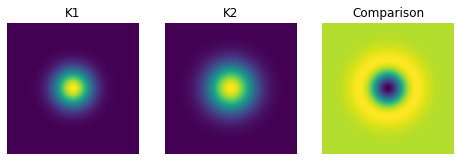

Erreur |K_pred - K_true|_2 : 0.2811 


In [5]:
sigma,moy  = 0.25, 0.0
K_shift    = np.exp(-( (gd-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_shift    = K_shift/np.sum(K_shift)
K_shift    = Simplex(K_shift) # Simplex
Display_ker(K_shift,K,mysize=(8,4))

### Initialisation juste - bruit 1%

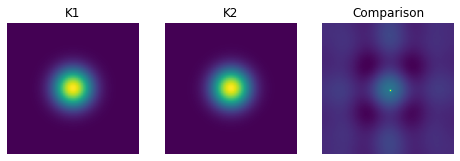

Erreur |K_pred - K_true|_2 : 0.0026 


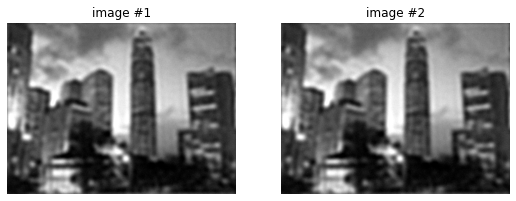

Erreur |x_pred - x_true|_2 :0.0065


In [6]:
alpha = 0
mu    = 5
K_in   = K.copy()
x_in  = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation juste, bruit 0.05')

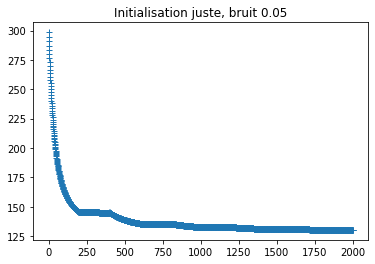

In [7]:
plt.plot(Etot,'+')
plt.title("Initialisation juste, bruit 0.05")

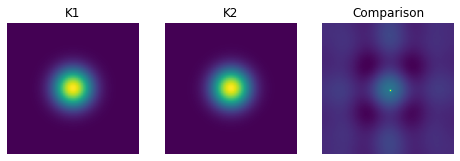

Erreur |K_pred - K_true|_2 : 0.0026 


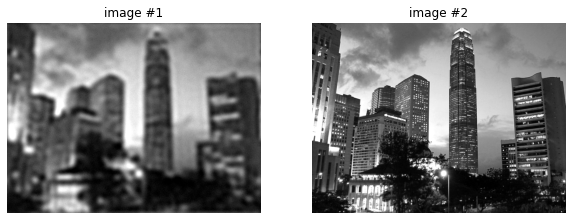

Erreur |x_pred - x_true|_2 :0.2436


In [8]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation noyau proche - pas de bruit

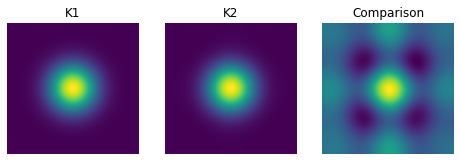

Erreur |K_pred - K_true|_2 : 0.0113 


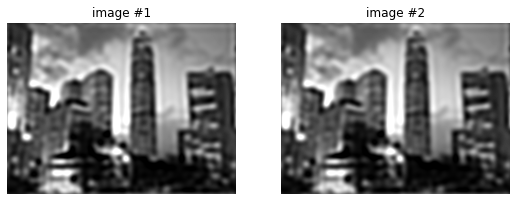

Erreur |x_pred - x_true|_2 :0.0122


In [16]:
alpha = 1
mu    = 0.5
K_in      = K_shift.copy()
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, pas de bruit')

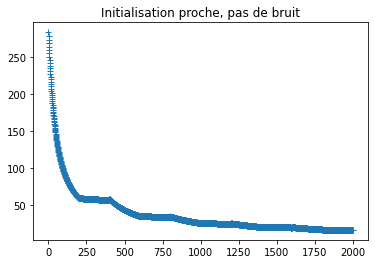

In [17]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, pas de bruit")

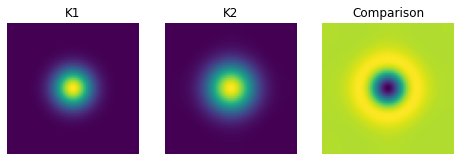

Erreur |K_pred - K_true|_2 : 0.2744 


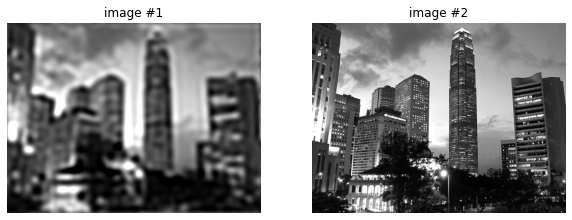

Erreur |x_pred - x_true|_2 :0.2491


In [18]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation proche - bruit 1%

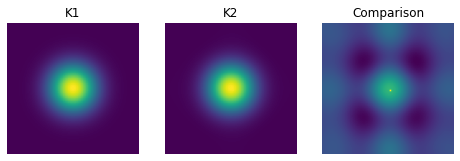

Erreur |K_pred - K_true|_2 : 0.0114 


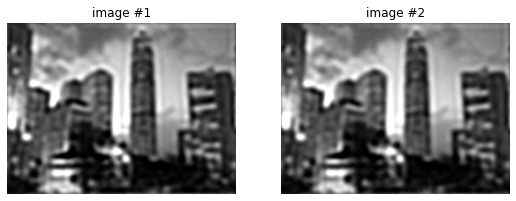

Erreur |x_pred - x_true|_2 :0.0122


In [12]:
alpha = 1
mu    = 5
K_in      = K_shift.copy()
x_in      = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01')

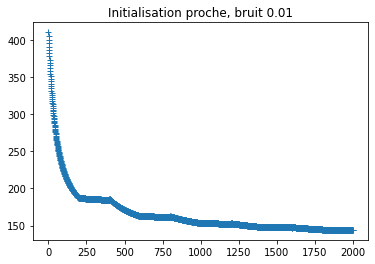

In [13]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")

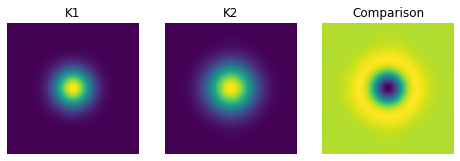

Erreur |K_pred - K_true|_2 : 0.2744 


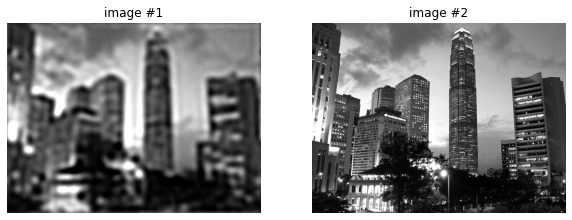

Erreur |x_pred - x_true|_2 :0.2532


In [14]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

In [15]:
import sys
sys.exit()

SystemExit: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# ANNEXES

### Initialisation proche - bruit 1% - projection sur le simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation lointaine, bruit 1%, proj sur simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))